# Modeling population dynamics and predation

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Rabbits without any predator, in an infinite world full of food

As suggested by the title, we would like to first define a model that explains the population growth of rabbits.  
Let's for a second assume that these lucky rabbits live in a very large area, possibly infinite, and they have plenty of food. This scenario may appear unrealistic but it is reasonable if the rabbits are introduced in a vast region that lacks any predator (for example, as it happened in Australia in the late 19th century). How would the population grow? Rabbits reproduce very quickly, and under these conditions the change in rabbit population per month would be positive (as births outnumber deaths), and proportional to the size of the current population (the more rabbits you have, the more baby rabbits you will find after one month).  
This scenario can be modeled by this simple differential equation:

\begin{equation}
\frac{dx}{dt} = \alpha x
\end{equation}

where $x$ is the rabbit population size, $t$ is the time (in our case measured in units of months), and $\alpha$ is a parameter that measures how quickly rabbits reproduce, and it corresponds to the inverse of the time it takes for the population to increase by a factor of e~2.7 (so a bit more than the doubling time).  
To study the dynamics of the population, we can write a simulation that solves the above differential equation using the Euler algorithm.  
As we did before, we first define a function that compute the derivative of the population, then we use this function into another simulation function that implements the Euler algorithm and performs the actual simulation (this is useful to avoid mistakes when implementing the Euler algorithm, especially when model is complex, and it easily generalizes to more accurate algorithms for integrating ordinary differential equations).    
Remember that if the rabbit population is less than 2, these rabbits will not be able to produce any offspring, so eventually these rabbits will die, so we can end the simulation.

In [2]:
def derivatives_rabbits_ideal(X,alpha):
    # compute derivative of eponential model as a function of current population, and parameter alpha
    
    return alpha*X

In [3]:
def run_simulation_rabbits_ideal(X0,alpha,dt,Tmax):
    # define lists Xhistory and times to store history of simulation
    Xhistory = [X0]
    times = [0.]
    # define current variables X and T
    X = Xhistory[-1]
    T = times[-1]
    # here write main loop that performs the simulation
    Nsteps = int(Tmax/dt)
    for i in range(Nsteps):
        T += dt
        k = derivatives_rabbits_ideal(X,alpha)
        X += k*dt
        times.append(T)
        Xhistory.append(X)
    # return times and populations
    return times, Xhistory

We measure time in months, and on average, after one month 2 rabbits give birth to an offspring of 2 baby rabbits, so a reasonable value is $\alpha=1$.  
Let's say we initially have a population of 4 rabbits.  
We can set a timestep of dt=0.01 months and a maximum time of 40 months.  
How many rabbits do we have at the end?  

you can also plot the data in logscale using `plt.yscale('log')`

After only 40 months, out population got to 10$^{17}$ individuals. How is that possible? Well those rabbits live in an infinite world full of food, it's not that surprising!

## 2. Rabbits in a finite world with finite resources (the logistic model)

How do we model population growth in a world that has limited resources?  
As the population approaches the maximum number of individuals that a certain environment can support, what we call the **carrying capacity C**, the rate of rabbit population growth should approach zero. We can include this effect by making a minor change to our previous differential equation.

\begin{equation}
\frac{dx}{dt} = \alpha \left( 1 - \frac{x}{C} \right) x
\end{equation}

You can now see that for a small population $x\sim 0$ the growth rate dx/dt/x is close to $\alpha$, as before, but when $x\sim C$ there is not enough food for all the rabbits and the growth rate becomes close to zero. Let's see what happens in a simulation

In [14]:
def derivatives_rabbits_capacity(X,alpha,C):
    return

In [15]:
def run_simulation_rabbits_capacity(X0,alpha,C,dt,Tmax):
    return

Now this seems more reasonable! The capacity C is now the maximum rabbit population that can be supported by the considered environment.  
But is this also realistic? Not really, because usually rabbits have predators, such as foxes!

## 3. Foxes without anything to prey

Let's first try modeling foxes without any prey to eat. That's a really unfortunate situation for a population of foxes, because without food, the population would simply die off. Assuming the death rate to be constant, we can model this situation with the following differential equation:

\begin{equation}
\frac{dy}{dt} = -\gamma y
\end{equation}
where $\gamma$ is the inverse time it takes for the population to decrease by a factor of e~2.7

In [17]:
def derivatives_foxes(Y,gamma):
    return

In [18]:
def run_simulation_foxes(Y0,gamma,dt,Tmax):
    return

We can start from a large population of 100 thousand foxes. $\gamma$ can be set to 1, about half of the foxes die after one month of starvation.

It only takes 10 months for the entire population to collapse!

## 4. Foxes and rabbits together - Predation

In order to model a more realistic scenario where rabbits $x$ and foxes $y$ live together, we need a model that explains how foxes influence rabbits, and vice-versa. This is given by the so-called Lotka-Volterra equations:

\begin{align}
\frac{dx}{dt} &= \alpha x -\beta x y   \\
\frac{dy}{dt} &= -\gamma y +\delta x y
\end{align}
where $-\beta x y$ represents the death of rabbits due to their encounter with foxes    
and $\delta xy$ the growth of foxes thanks to the successful hunting of rabbits.  
Note that in this simple model we can ignore the capacity of the environment because the rabbit population is already limited by the foxes, although in principle this can also be added.

This model can be used to explain the observation of oscillations in the polulations of preys and predators in the wild, as those of lynx and hare [C. Elton & M. Nicholson, The Ten-Year Cycle in numbers of the Lynx in Canada, Journal of Animal Ecology, 11, 215-244, 1942]. Data uploaded to PandA.

Text(0, 0.5, 'population (thousands of furs)')

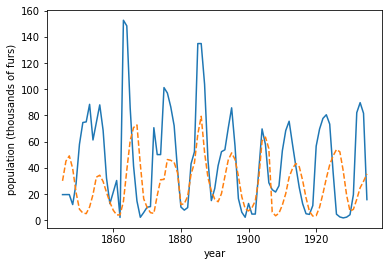

In [3]:
years=[]
hare_history=[]
lynx_history=[]
for line in open('hare_lynx_populations.dat','r').readlines():
    if line[0]=='#': continue # this is a comment
    tokens=line.split()
    years.append( float(tokens[0]) )
    hare_history.append( float(tokens[1]) )
    lynx_history.append( float(tokens[2]) )
plt.plot(years,hare_history,'-',label='hare')
plt.plot(years,lynx_history,'--',label='lynx')
plt.xlabel('year')
plt.ylabel('population (thousands of furs)')

**Task:** based on the previous simulations, write a new simulation for the dynamics of both rabbits and foxes over 40 months using the Euler algorithm.

Note that our differential equation has two variables, the populations of rabbits $x$ and foxes $y$, so the equation takes the general form:
\begin{equation}
\frac{d{\bf x}}{dt} = {\bf f}({\bf x},t)
\end{equation}
where in our case ${\bf f}({\bf x},t)=(\alpha x -\beta x y,-\gamma y + \delta x y)$ is the function that computes the two derivatives of the variables ${\bf x}=(x,y)$ (note we do not have any time dependence in our Lotka-Volterra model, ${\bf f}({\bf x},t)= {\bf f}({\bf x})$).

In order to implement the Euler algorithm correctly, at each timestep $n$ we have to first compute the two derivatives based on the value of the variables at step $n$, and then only after add the increments to get the value of the variables at step $n+1$:
\begin{align}
{\bf k} &= {\bf f}({\bf x}_n,t_n) \\
{\bf x}_{n+1} &= {\bf x}_{n} + {\bf k} dt \\
t_{n+1} &= t_n + dt
\end{align}
Computing the derivatives should be done using an approrpiate function that takes as arguments the variables and parameters of the model and return both derivatives (separated by a comma).

We can use the settings:  
$x_0=400$  
$y_0=100$  
$\alpha=\gamma=1.0$  
$\beta=0.01$  
$\delta=0.005$  
But you should try to change the parameters to explore how they affect the dynamics of the system.

**Questions:**  
- How do the populations of rabbits and foxes change over time? Does it resemble the data collected on lynx and hare populations? Can you qualitatively explain this behavior?
- How do the parameters and initial conditions affect the period and amplitude of the observed cycles?  
- It is also helpful to plot the rabbits and foxes populations together on the same plot in 2 dimensions, without using the time. Use this kind of plot to compare the same model (same $\alpha$,$\beta$,$\gamma$,$\delta$) but with different initial conditions (e.g. try to change $x_0$ to 500, 300, or 200).  
-  Try to set the initial conditions to the so-called **fixed point**: $x_0=\gamma/\delta$ and $y_0=\alpha/\beta$. What happens over time? Can you explain why this happens by substituting the values of $x$ and $y$ into the differential equation?

## 5.** A more accurate Lotka-Volterra simulation using the Runge-Kutta method

If you want to perform an accurate simulation for this model, it is best to use the classic Runge-Kutta method (also known as Runge-Kutta 4th order, or RK4) <https://en.wikipedia.org/wiki/Runge-Kutta_methods>, which is more accurate than the Euler method for solving ordinary differential equations:  
\begin{align}
\frac{d{\bf x}}{dt} &= {\bf f}({\bf x},t) \\
{\bf k}_1 &= {\bf f}({\bf x}_n,t_n) \\
{\bf k}_2 &= {\bf f}({\bf x}_n+{\bf k}_1 dt/2,t_n+dt/2) \\
{\bf k}_3 &= {\bf f}({\bf x}_n+{\bf k}_2 dt/2,t_n+dt/2) \\
{\bf k}_4 &= {\bf f}({\bf x}_n+{\bf k}_3 dt,t_n+dt) \\
{\bf x}_{n+1} &= {\bf x}_{n} + \frac{1}{6}({\bf k}_1 + 2{\bf k}_2 + 2{\bf k}_3 + {\bf k}_4) dt \\
t_{n+1} &= t_n + dt
\end{align}
Where ${\bf f}({\bf x},t)$ computes the derivatis in the model. Again, note there is no time dependence in our specific case.  
**Task:** Implement the Runge-Kutta method and compare the results with those of the Euler method. The difference in behavior is apparent especially when looking at the plots of rabbits versus foxes, without time.  

## 6.** The effect of pesticides on the equilibrium between species

Imagine you are a farmer that wants to defend your land from an invasion of rabbits that steal your vegetables. You could place poison around the fields. However, these would inevitably also kill the foxes that prey on the rabbits. You can assume that the poison kills both rabbits and foxes at the same rate $p=0.5$ (here $p$ is a death rate with units of months$^{-1}$, and its inverse $1/p$ represents the typical time it takes for a rabbit or a fox to die due to poisoning).  
**Task:** How does this modify your previous Lotka-Volterra model? Run a simulation with the new parameters and evaluate the changes on the populatin dynamics of the system. What would be the effect on the equilibrium population of rabbits and foxes? Did you reach your aim of reducing the number of rabbits around your field? What about the foxes?

More on this problem: [Lester et al. Journal of applied Ecology 35.2 (1998): 323 ; Li and Yang. Commun Nonlinear Sci Numer Simul 29.1-3 (2015): 179]

## 7.** Why are cycles hard to observe in experiments?

In experiments, it is quite hard to observe stable cycles of oscillating prey and predator populations. For example, experiments since the 30s failed to find evidence of the cycles predicted by the Lotka-Volterra model [Gause. The Struggle for Existence. Courier Dover Publications, 2019] (these have only been recently observed in a simple model system of predation [Blasius et al. Nature 577, 226–230 (2020)]). Instead, in many situations, the two populations are unstable, and one or both species at some point become extinct. Why is that? One possibility is that our model is too simple and it does not capture the entire complexity of the interactions between different species. We can try to explore this question by changing our equations. A very simple extension of the Lotka-Volterra model is one that assumes that prey-predator interactions are not linear. This may happen for example when the prey has some response machanisms such as hiding or releasing toxins:
\begin{align}
\frac{dx}{dt} &= \alpha x -\beta y \left(\frac{x}{1+x/K}\right)  \\
\frac{dy}{dt} &= -\gamma y +\delta y \left(\frac{x}{1+x/K}\right)
\end{align}
which assumes that when the prey population becomes higher than K, prey-predator encounters become less frequent.

**Task:** Implement the model above and simulate the dynamics of the two populations. Initially you can use K=2000, but you should also try different values. What is happening in this scenario? Also plot the two populations without time as done before.  
This model sometimes gives what is called a paradox of enrichment, a situation where the predator population becomes extinct even if there is plenty of prey to eat. Can you find this situation for some of the parameters?